___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 9: Basic of artificial neural network

## Lab work 9



#### Мета: 

* написати программу, що запам'ятає обличчя та буде розпізнавати його на фото

In [2]:
import sys
!{sys.executable} -m pip install opencv-python

  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)


In [21]:
import sys
!{sys.executable} -m pip install mtcnn

  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)


In [ ]:
import sys
#!{sys.executable} -m pip uninstall tensorflow
!{sys.executable} -m pip install tensorflow

In [19]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
import os

#print(os.getcwd())
# load the photograph
pixels = imread('IMG_0139s.JPG')

# load the pre-trained model
classifier = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.1, 8)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 5)
# show the image
imS = cv2.resize(pixels, (1000, 800))  
imshow("output", imS) 
#imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

In [25]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from warnings import filterwarnings
filterwarnings ('ignore')

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

# draw each face separately
def draw_faces(filename, result_list, isgray):
    # load the image
    data = pyplot.imread(filename)
    if isgray:
        data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)  
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        if isgray:        
            pyplot.imshow(data[y1:y2, x1:x2], cmap='gray')
        else:
            pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()
    
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    

filename = 'IMG_0139s.JPG'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

# display faces on the original image
draw_faces(filename, faces, False)
draw_faces(filename, faces, True)

In [ ]:
# Create image set for train
import cv2
import os

video = cv2.VideoCapture(0)
facedetect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
count = 0
while True:
    ret, frame = video.read()
    faces=facedetect.detectMultiScale(frame, 1.3, 5)
    for x,y,w,h in faces:
        count=count + 1
        name = './paul/'+ 'paul200'+str(count)+'.jpg'
        print('Creating Images...' + name)
        cv2.imwrite(name, frame[y:y+h,x:x+w])
        cv2.rectangle(frame, (x,y),(x+w, y+h), (0,255,0),3)
    cv2.imshow("WindowFrame", frame)
    cv2.waitKey(1)
    if count>200:
        break
video.release()
cv2.destroyAllWindows()

In [46]:
video.release()
cv2.destroyAllWindows()

In [84]:
import sys
#!{sys.executable} -m pip uninstall tensorflow
!{sys.executable} -m pip uninstall opencv-python
#!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip uninstall opencv_contrib_python
#!{sys.executable} -m pip install opencv-contrib-python --upgrade
#!{sys.executable} -m pip install opencv-contrib-python --user

^C
^C


In [ ]:
# Train model for Paul images
import cv2
import os
import numpy as np
from PIL import Image
#from cv2.face import face
#print(help(cv2.face))
print(help(cv2))

In [118]:
# Train model for Paul images
import cv2
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot
#from cv2.face import face
#print(help(cv2.face))
#rint(help(cv2))

BASE_DIR = os.getcwd()
facedetect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() #cv2.face.createLBPHFaceRecognizer()

#print(BASE_DIR)
y_labels = []
x_train = []
label_ids = {}
i = 0
for root, dirs, files in os.walk('./paul'):
    for file in files:
        #print(os.path.basename(file))
        path = os.path.join(root,file)
        #pyplot.imshow(Image.open(path))
        pil_image = Image.open(path).convert("L") #gray
        #i+=1
        #pyplot.subplot(1, 201, i)
        #pyplot.axis('off')
        #pyplot.imshow(pil_image)
        image_array = np.array(pil_image, "uint8")
#        faces = facedetect.detectMultiScale(image_array, scaleFactor=1.02, minNeighbors=2, minSize=[100,100])
        faces = facedetect.detectMultiScale(image_array, scaleFactor=1.05, minNeighbors=5, minSize=(100,100))

        label_ids["Paul"] = 1
        id_ = 1
        #print(len(faces))
        for (x,y,w,h) in faces:
            roi = image_array[y:y+h, x:x+w]
            #pyplot.imshow(roi)
            x_train.append(roi)
            y_labels.append(id_)
            
#print(x_train)
#print(y_labels)
pyplot.show()
recognizer.train(x_train, np.array(y_labels))
recognizer.save("train_set.yml")

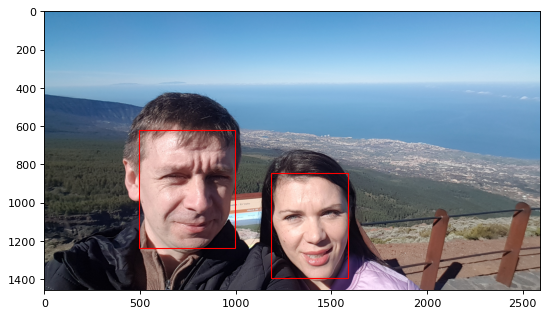

Paul 43.95% 1182 846
Paul 51.87% 493 620


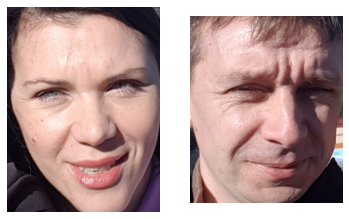

In [121]:
# Try to recognize photo
import cv2
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from warnings import filterwarnings
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
filterwarnings ('ignore')

BASE_DIR = os.getcwd()
facedetect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() #cv2.face.createLBPHFaceRecognizer()
recognizer.read("train_set.yml")

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	labels = {1 : "Paul"}
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		x2, y2 = x + width, y + height
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		id_, conf = recognizer.predict(cv2.cvtColor(data[y:y2, x:x2], cv2.COLOR_BGR2GRAY))
		if conf>=45 and conf < 85:
			#print(labels[id_], conf)
			cv2.putText(data, (labels[id_] + ':' + str(conf)), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 5, cv2.LINE_AA)
	# show the plot
	pyplot.show()

# draw each face separately
def draw_faces(filename, result_list, isgray):
    # load the image
    data = pyplot.imread(filename)
    labels = {1 : "Paul"}
    if isgray:
        data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)  
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        if isgray:        
            pyplot.imshow(data[y1:y2, x1:x2], cmap='gray')
        else:
            pyplot.imshow(data[y1:y2, x1:x2])
            
        id_, conf = recognizer.predict(cv2.cvtColor(data[y1:y2, x1:x2], cv2.COLOR_BGR2GRAY)) 
        print(labels[id_], str(round(conf, 2)) + '%', x1, y1)
#        if conf>=45 and conf < 85:
#            print(labels[id_], conf, x1, y1)
#            cv2.putText(data[y1:y2, x1:x2], (labels[id_] + ':' + str(conf)), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
    # show the plot
    pyplot.show()
    
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    

filename = '20200128_144348.jpg'#'IMG_0139s.JPG'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

# display faces on the original image
draw_faces(filename, faces, False)
#draw_faces(filename, faces, True)

#### Общий алгоритм распознавания лица человека на фото следующий:
1. Формируем датасет изображений человека, которого планируем искать на фото (к примеру, используем Вёб-камеру с качественным освещением).
2. Полученный датасет используем для обучения модели (CVOpen) - качество распознавания зависит от качества фото, используемых при обучении, количестве этих фото, установках/настройках алгоритма обучения.
3. Для определения лиц на фото используем библиотеку TensorFlow
4. Полученные лица "сверяем" с данными в обученной модели и на основе расчётной достоверности либо выбираем нужное лицо, либо проверяем корректность обучения и настроек.